# Metric on Prompts where Model is Asked to Play a Role

Gemma was prompted to assume various roles—stand-up comedian, stand-up comedy fan, or stand-up comedy critic—before being instructed to extract the most humorous quotes. The role assumption did not significantly alter the results, with all roles except the critic yielding similar performance levels, averaging approximately 28%. The critic role, however, produced a slightly lower average score of 29%.

Prompt: "Pretend that you are a stand-up comedian / stand-up comedy fan / stand-up comedy critic reading the following stand-up comedy transcript. Extract the key humorous lines and punchlines for this stand-up comedy transcript. Focus on the quotes highlighting the main comedic moments. List of quotes:"

### Imports

In [2]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [3]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
comedian_pretend = pd.read_csv("/home/ada/humor/data/stand_up_dataset/comedian_quotes - Sheet1.csv")
comedyfan_pretend = pd.read_csv("/home/ada/humor/data/stand_up_dataset/comedy_fan_laughter_quotes - Sheet1.csv")
comedycritic_pretend = pd.read_csv("/home/ada/humor/data/stand_up_dataset/comedy_critic_quotes - Sheet1.csv")

### Experiment

In [4]:
gemma_metric = bipartite_metric(gemma, ground_truth)
print("Gemma:", gemma_metric.select_dtypes(include='number').mean())

comedian_pretend_metric = bipartite_metric(comedian_pretend, ground_truth)
print("Comedian role:", comedian_pretend_metric.select_dtypes(include='number').mean())

comedyfan_pretend_metric = bipartite_metric(comedyfan_pretend, ground_truth)
print("Comedy Fan role:", comedyfan_pretend_metric.select_dtypes(include='number').mean())

comedycritic_pretend_metric = bipartite_metric(comedycritic_pretend, ground_truth)
print("Comedy Critic role:", comedycritic_pretend_metric.select_dtypes(include='number').mean())

Gemma: score    28.171599
dtype: float64
Comedian role: score    28.529787
dtype: float64
Comedy Fan role: score    28.227768
dtype: float64
Comedy Critic role: score    29.085821
dtype: float64


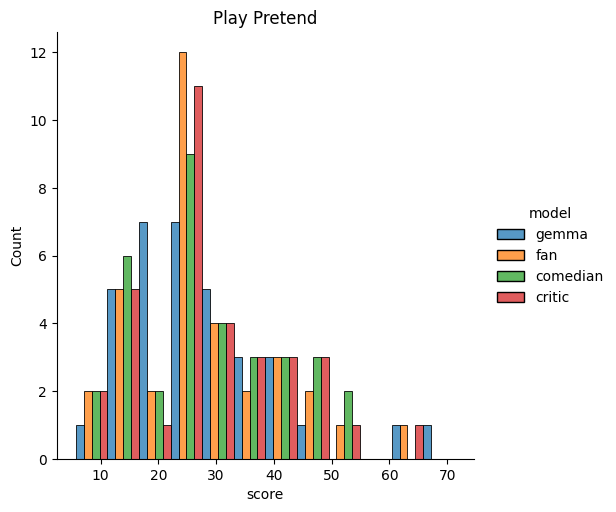

In [6]:
gemma = gemma_metric.assign(model = "gemma")
fan = comedyfan_pretend_metric.assign(model="fan") 
comedian = comedian_pretend_metric.assign(model="comedian") 
critic = comedycritic_pretend_metric.assign(model="critic")

df = pd.concat([gemma, fan, comedian, critic]).reset_index(drop=True)
sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge", bins=12)
plt.title("Play Pretend")
plt.show()